In [63]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [64]:
df = pd.read_excel('20200229交割单.xlsx')

In [65]:
df.loc[:, '发生金额'] = df.发生金额*-1

In [66]:
df.head()

,发生日期,备注,证券代码,证券名称,买卖标志,成交数量,成交价格,成交金额,佣金,印花税,过户费,发生金额,其他费
0,20200204,"122扣除金额 基金代码：940018,发生份额：4000,日期:20200204(122)",940018,天天发１天期,基金资金拨出,4000,1.000,0.0,0.00,0.0,0.0,4000.00,0.0
1,20200205,"122扣除金额 基金代码：940018,发生份额：250000,日期:20200205(122)",940018,天天发１天期,基金资金拨出,250000,1.000,0.0,0.00,0.0,0.0,250000.00,0.0
2,20200207,证券买入,162411,华宝油气,证券买入,10000,0.363,3630.0,1.09,0.0,0.0,3631.09,0.0
3,20200207,"122扣除金额 基金代码：940018,发生份额：407.69,日期:20200207(122)",940018,天天发１天期,基金资金拨出,407,1.000,0.0,0.00,0.0,0.0,407.69,0.0
4,20200207,"124增加金额 基金代码：940018,发生份额：4039.78,日期:20200207(124)",940018,天天发１天期,基金资金拨入,4039,1.000,0.0,0.00,0.0,0.0,-4039.78,0.0


In [38]:
df.备注.value_counts()

证券买入                                                   62
证券卖出                                                   11
122扣除金额 基金代码：007118,发生份额：95319.8,日期:20200224(122)       2
失败原因:违规重复;错误号:02                                        2
122扣除金额 基金代码：940018,发生份额：32.82,日期:20200213(122)         1
融券回购购回日:20200215预计利息:6.86参考占款天数：1-888880                1
融券购回:3.04实际占款天数：1-131990                                1
融券回购购回日:20200215预计利息:26.85参考占款天数：1-888880               1
122扣除金额 基金代码：940018,发生份额：262.9,日期:20200225(122)         1
融券回购购回日:20200214预计利息:80.38参考占款天数：3-888880               1
122扣除金额 基金代码：940018,发生份额：13747.33,日期:20200227(122)      1
122扣除金额 基金代码：007118,发生份额：114285.71,日期:20200227(122)     1
融券购回:1.9实际占款天数：3-131990                                 1
100083577804                                            1
融券回购购回日:20200213预计利息:7.12参考占款天数：1-888880                1
116902604                                               1
122扣除金额 基金代码：940018,发生份额：862.12,日期:20200212(122)        1
100002620254  

In [39]:
df = df[df.备注.isin(['证券买入', '证券卖出'])]

# 计算每日交易成本和数量

In [40]:
dfg = df.groupby(['证券名称','买卖标志','发生日期'])['成交数量','成交金额','发生金额'].sum()

In [41]:
dfg['成交平均价格'] = round(dfg.成交金额/dfg.成交数量, 3)

In [58]:
dfg

成交数量     成交金额      发生金额  成交平均价格
证券名称   买卖标志 发生日期                                      
300ETF 证券买入 20200210   1300   5015.4   5016.90   3.858
            20200212   1300   5120.7   5122.24   3.939
            20200214   1300   5128.5   5130.04   3.945
            20200217   1300   5181.8   5183.35   3.986
            20200221    800   3298.4   3299.39   4.123
            20200224   1300   5359.9   5361.51   4.123
            20200226  13900  56489.6  56495.25   4.064
            20200228   1000   4000.0   4000.40   4.000
       证券卖出 20200221  -1300   5389.8  -5388.18  -4.146
500ETF 证券买入 20200219    900   5502.6   5504.25   6.114
            20200226   4900  30836.2  30839.28   6.293
            20200227    900   5602.5   5603.06   6.225
            20200228    200   1212.2   1212.32   6.061
       证券卖出 20200221   -900   5628.6  -5626.91  -6.254
中源协和   证券买入 20200219   1600  29184.0  29193.34  18.240
       证券卖出 20200228  -1600  29664.0 -29628.41 -18.540
创业板    证券买入 20200210   2600   5070.8   5072.32   1.950
            20200212   2600   5046.6   5048.11   1.941
            20200214   2600   5155.8   5157.35   1.983
            20200219   2400   4992.0   4993.50   2.080
            20200221   1700   3570.0   3571.07   2.100
            20200224   2400   5128.8   5130.34   2.137
            20200226  14000  30268.0  30271.03   2.162
            20200227    500   1042.0   1042.10   2.084
            20200228    500   1020.5   1020.60   2.041
       证券卖出 20200224  -1400   3047.8  -3047.50  -2.177
            20200225  -3600   7862.4  -7861.61  -2.184
华宝油气   证券买入 20200207  10000   3630.0   3631.09   0.363
            20200217   1500    528.0    528.16   0.352
            20200219   4500   1575.0   1575.47   0.350
            20200221   3000   1077.0   1077.32   0.359
            20200224   3000   1050.0   1050.32   0.350
            20200226   3000   1023.0   1023.10   0.341
            20200228   1600    508.8    508.90   0.318
广发医药   证券卖出 20200219   -700   1055.6  -1055.28  -1.508
新能车    证券买入 20200224    500    610.0    610.18   1.220
            20200226    400    498.4    498.50   1.246
            20200228    500    567.5    567.60   1.135
生物医药   证券买入 20200224    500    698.5    698.71   1.397
            20200227    400    552.4    552.50   1.381
            20200228    400    540.0    540.10   1.350
科技ETF  证券买入 20200219    400    604.0    604.18   1.510
            20200221    400    618.4    618.59   1.546
            20200224    400    633.6    633.79   1.584
            20200226    400    652.4    652.50   1.631
            20200228    400    602.0    602.10   1.505
       证券卖出 20200225   -400    665.2   -665.10  -1.663
芯片ETF  证券买入 20200217    500    555.0    555.17   1.110
            20200219    500    590.5    590.68   1.181
            20200221    500    617.5    617.69   1.235
            20200224    500    639.5    639.69   1.279
            20200226    400    550.0    550.10   1.375
            20200228    500    575.0    575.10   1.150
       证券卖出 20200221   -500    632.0   -631.81  -1.264
            20200225   -500    680.0   -679.90  -1.360
证券ETF  证券买入 20200217    600    588.0    588.18   0.980
            20200219    600    597.6    597.78   0.996
            20200221   3000   3198.0   3198.96   1.066
            20200224   4700   4972.6   4974.09   1.058
            20200226  28500  29953.5  29956.50   1.051
            20200227   4800   5054.4   5054.91   1.053
            20200228   1000   1025.0   1025.10   1.025
       证券卖出 20200221   -600    658.2   -658.00  -1.097
银行ETF  证券买入 20200217    500    522.0    522.16   1.044
       证券卖出 20200219  -3200   3372.8  -3371.79  -1.054
黄金ETF  证券买入 20200224    300   1118.4   1118.74   3.728
            20200226    300   1100.1   1100.21   3.667
            20200228    200    730.4    730.50   3.652

# 计算成本变化

In [43]:
dfg1 = df.groupby(['证券名称','发生日期'])['成交数量','成交金额','发生金额'].sum()

In [44]:
dfg1 = dfg1.reset_index(level=0)

In [45]:
dfg1 = dfg1.groupby('证券名称').expanding().sum().reset_index(level=0)

In [51]:
dfg1['实时成本'] = round(dfg1.发生金额/dfg1.成交数量, 3)

In [59]:
dfg1

,证券名称,成交数量,成交金额,发生金额,实时成本
发生日期,,,,,
20200210,300ETF,1300.0,5015.4,5016.90,3.859
20200212,300ETF,2600.0,10136.1,10139.14,3.900
20200214,300ETF,3900.0,15264.6,15269.18,3.915
20200217,300ETF,5200.0,20446.4,20452.53,3.933
20200221,300ETF,4700.0,29134.6,18363.74,3.907
20200224,300ETF,6000.0,34494.5,23725.25,3.954
20200226,300ETF,19900.0,90984.1,80220.50,4.031
20200228,300ETF,20900.0,94984.1,84220.90,4.030
20200219,500ETF,900.0,5502.6,5504.25,6.116


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

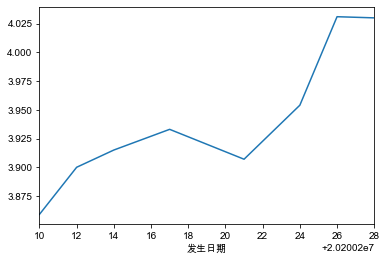

In [55]:
dfg1[dfg1.证券名称=='300ETF'].实时成本.plot()

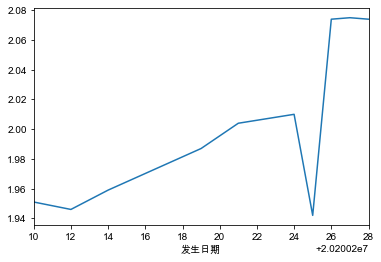

In [61]:
dfg1[dfg1.证券名称=='创业板'].实时成本.plot()

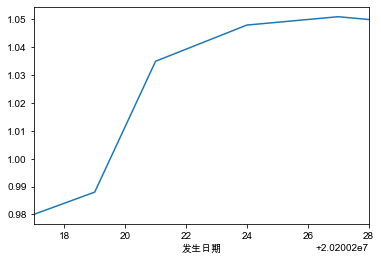

In [62]:
dfg1[dfg1.证券名称=='证券ETF'].实时成本.plot()

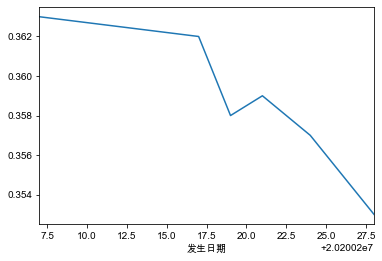

In [60]:
dfg1[dfg1.证券名称=='华宝油气'].实时成本.plot()